In [90]:
# %cd '/content/drive/Shareddrives/utshabkg'
# !git clone https://github.com/utshabkg/ML_Competition-AND-Practice.git

In [91]:
%cd '/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset/'

/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import re
import random
from tqdm import tqdm
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array

In [126]:
train = pd.read_csv('/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset/train.csv')
test = pd.read_csv('/content/drive/Shareddrives/utshabkg/ML_Competition-AND-Practice/Competition/HackerEarth Fast, Furious and Insured/dataset/test.csv')
train.shape, test.shape

((1399, 8), (600, 6))

In [127]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [128]:
numbered = 'train_num'
if not os.path.exists(numbered):
    os.mkdir(numbered)

In [129]:
import shutil
for i in range(train.shape[0]):
    image = train.loc[i, 'Image_path']
    shutil.copy(f'trainImages/{image}', f'train_num/{str(i).zfill(4)}.jpg')
    train.loc[i, 'Image_path'] = f'{str(i).zfill(4)}.jpg'

In [130]:
train.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,0000.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,0001.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,0002.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,0003.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,0004.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [134]:
len(os.listdir('train_num'))

1403

### Split damaged and undamaged images

In [135]:
# !rm -rf 'train_num/damaged' 'train_num/undamaged'

In [136]:
damaged = 'train_num/damaged'
undamaged = 'train_num/undamaged'
if not os.path.exists(undamaged):
    os.mkdir(undamaged)
if not os.path.exists(damaged):
    os.mkdir(damaged)

In [137]:
train['Condition'].isnull().sum()

0

In [138]:
j = 0
for i in train['Condition']:
    image = train.loc[j, 'Image_path']
    if i==0:
        shutil.copy(f'train_num/{image}', f'train_num/undamaged/{image}')
    else:
        shutil.copy(f'train_num/{image}', f'train_num/damaged/{image}')
    if (j+1) % 200 == 0:
        print(f'{j+1} images are done')
    j += 1
print('Train images are splited')

200 images are done
400 images are done
600 images are done
800 images are done
1000 images are done
1200 images are done
Train images are splited


In [139]:
train_damaged = os.listdir(damaged)
train_undamaged = os.listdir(undamaged)

In [140]:
def plot_bar(class_labels, counts, name):
    plt.figure(figsize = (5,5))
    f = sns.barplot(x = classes, y =counts)
    plt.xlabel("Class labels", fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title("Number of Images in "+name+' folder', fontsize=15)
    plt.show()

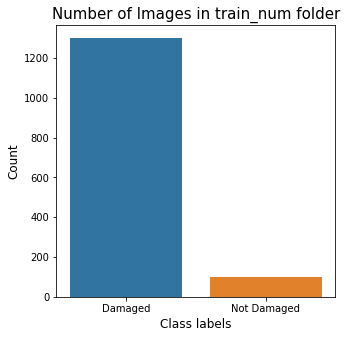

Number of Damaged images in trainImages is 1300
Number of Not Damaged images in trainImages is 99


In [141]:
classes = ['Damaged', 'Not Damaged']
counts = [len(train_damaged), len(train_undamaged)]
plot_bar(classes, counts, 'train_num')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in trainImages is '+str(counts[i]))

# Imbalance!!!

>  LCM of 1300 and 99 is 128700.

> Let's work with 3900 images in both classes.


In [142]:
damaged_aug = 'train_num/damaged_aug'
undamaged_aug = 'train_num/undamaged_aug'
if not os.path.exists(undamaged_aug):
    os.mkdir(undamaged_aug)
if not os.path.exists(damaged_aug):
    os.mkdir(damaged_aug)

In [143]:
os.listdir('train_num/damaged')[0]

'0001.jpg'

In [148]:
# %reload_ext autoreload
# %autoreload 2
# %matplotlib inline
# from fastai.vision import *

path = Path('train_num')
# path_hr = path/'damaged'
# il = ImageList.from_folder(path_hr)
path_hr = path/'damaged_aug'
# tfms = get_transforms(max_rotate=25)

# def data_aug_one(ex_img, prox, qnt):
#     for lop in range(0, qnt):
#         image_name = str(prox).zfill(4) +'.jpg'
#         dest = path_hr/image_name
#         prox = prox + 1
#         if not os.path.exists(dest):
#             new_img = open_image(ex_img)
#             new_img_fin = new_img.apply_tfms(tfms[0], new_img, xtra={tfms[1][0].tfm: {"size": 224}}, size=224)
#             new_img_fin.save(dest)

# prox = 1
# qnt = 2
# for imagen in il.items:
#    data_aug_one(imagen, prox, qnt)
#    prox = prox + qnt

In [149]:
len(os.listdir(path_hr))

2600

In [150]:
path = Path('train_num')
# path_hr = path/'undamaged'
# il = ImageList.from_folder(path_hr)
path_hr = path/'undamaged_aug'
# tfms = get_transforms(max_rotate=25)

# def data_aug_one(ex_img, prox, qnt):
#     for lop in range(0, qnt):
#         image_name = str(prox).zfill(4) +'.jpg'
#         dest = path_hr/image_name
#         prox = prox + 1
#         if not os.path.exists(dest):
#             new_img = open_image(ex_img)
#             new_img_fin = new_img.apply_tfms(tfms[0], new_img, xtra={tfms[1][0].tfm: {"size": 224}}, size=224)
#             new_img_fin.save(dest)
# prox = 1
# qnt = 39
# for imagen in il.items:
#    data_aug_one(imagen, prox, qnt)
#    prox = prox + qnt

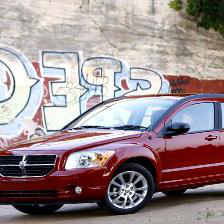

In [151]:
# len(os.listdir(path_hr))
il = ImageList.from_folder('train_num/undamaged_aug')
il[0]

### Delete last 60 images to keep 3900 [3861 - 60 + 99(previous)]

In [153]:
os.listdir(path_hr)[-1]
# len(os.listdir(path_hr))

'3801.jpg'

In [113]:
# for i in range(3802, 3862, 1):
#     p = f'train_num/undamaged_aug/{i}.jpg'
#     os.remove(p)
# len(os.listdir(path_hr))

3801

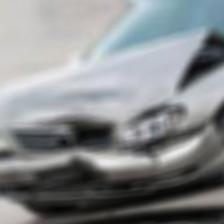

In [154]:
from google.colab.patches import cv2_imshow
img = cv2.imread('train_num/damaged_aug/0002.jpg')
 
cv2_imshow(img)

### Merge all into one

In [155]:
train_aug = train.copy()
train_damaged = train[train['Condition'] == 1].reset_index()
train_undamaged = train[train['Condition'] == 0].reset_index()
train_damaged

,index,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,1,0001.jpg,BQ,50700.0,1267.5,2025-07-10,12753.0,1,6194.0
1,3,0003.jpg,A,33500.0,837.5,2022-08-02,8453.0,1,7699.0
2,4,0004.jpg,AC,27600.0,690.0,2026-05-01,6978.0,1,8849.0
3,5,0005.jpg,AC,50700.0,1267.5,2026-08-07,12753.0,1,253.0
4,6,0006.jpg,AC,53200.0,1330.0,2028-01-12,13378.0,1,4013.0
...,...,...,...,...,...,...,...,...,...
1295,1394,1394.jpg,DA,52300.0,1307.5,2025-02-17,13153.0,1,4565.0
1296,1395,1395.jpg,BQ,41500.0,1037.5,2023-12-30,10453.0,1,3363.0
1297,1396,1396.jpg,AA,31400.0,785.0,2022-11-25,7928.0,1,5336.0
1298,1397,1397.jpg,A,33200.0,830.0,2022-10-10,8378.0,1,8734.0


In [156]:
len(os.listdir('train_num/damaged_aug'))

2600

In [157]:
path = Path('train_num')
path_hr = path/'damaged_aug'
j = 0; cluster = 1
c = 1
for i in os.listdir(path_hr):
    image = train_damaged.loc[j, 'Image_path']
    shutil.copy(f'train_num/damaged_aug/{i}', f'train_num/damaged/{image[: -4]}_{i}')
    new_row = {'Image_path': f'{image[: -4]}_{i}', 'Insurance_company': train_damaged.loc[j, 'Insurance_company'], 'Cost_of_vehicle': train_damaged.loc[j, 'Cost_of_vehicle'], 'Min_coverage': train_damaged.loc[j, 'Min_coverage'],\
               'Expiry_date': train_damaged.loc[j, 'Expiry_date'],	'Max_coverage': train_damaged.loc[j, 'Max_coverage'], 'Condition': train_damaged.loc[j, 'Condition'], 'Amount': train_damaged.loc[j, 'Amount']}
    train_aug = train_aug.append(new_row, ignore_index=True)
    
    if cluster % 2 == 0:
        j += 1

    cluster += 1
    if c % 200 == 0:
        print(f'damaged_aug {c} copy done')
    c += 1

damaged_aug 200 copy done
damaged_aug 400 copy done
damaged_aug 600 copy done
damaged_aug 800 copy done
damaged_aug 1000 copy done
damaged_aug 1200 copy done
damaged_aug 1400 copy done
damaged_aug 1600 copy done
damaged_aug 1800 copy done
damaged_aug 2000 copy done
damaged_aug 2200 copy done
damaged_aug 2400 copy done
damaged_aug 2600 copy done


In [160]:
len(os.listdir('train_num/damaged/' ))

3900

In [164]:
path = Path('train_num')
path_hr = path/'undamaged_aug'
j = 0; cluster = 1
c = 1
for i in os.listdir(path_hr):
    image = train_undamaged.loc[j, 'Image_path']
    shutil.copy(f'train_num/undamaged_aug/{i}', f'train_num/undamaged/{image[: -4]}_{i}')
    new_row = {'Image_path': f'{image[: -4]}_{i}', 'Insurance_company': train_undamaged.loc[j, 'Insurance_company'], 'Cost_of_vehicle': train_undamaged.loc[j, 'Cost_of_vehicle'], 'Min_coverage': train_undamaged.loc[j, 'Min_coverage'],\
               'Expiry_date': train_undamaged.loc[j, 'Expiry_date'],	'Max_coverage': train_undamaged.loc[j, 'Max_coverage'], 'Condition': train_undamaged.loc[j, 'Condition'], 'Amount': train_undamaged.loc[j, 'Amount']}
    train_aug = train_aug.append(new_row, ignore_index=True)

    if cluster % 39 == 0:
        j += 1
        
    cluster += 1
    if c % 200 == 0:
        print(f'undamaged_aug {c} copy done')
    c+= 1

undamaged_aug 200 copy done
undamaged_aug 400 copy done
undamaged_aug 600 copy done
undamaged_aug 800 copy done
undamaged_aug 1000 copy done
undamaged_aug 1200 copy done
undamaged_aug 1400 copy done
undamaged_aug 1600 copy done
undamaged_aug 1800 copy done
undamaged_aug 2000 copy done
undamaged_aug 2200 copy done
undamaged_aug 2400 copy done
undamaged_aug 2600 copy done
undamaged_aug 2800 copy done
undamaged_aug 3000 copy done
undamaged_aug 3200 copy done
undamaged_aug 3400 copy done
undamaged_aug 3600 copy done
undamaged_aug 3800 copy done


In [165]:
len(os.listdir('train_num/undamaged'))

3900

In [166]:
train_aug.to_csv('tr_aug.csv', index=False)
train_aug.shape

(7800, 8)

In [167]:
train_aug

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,0000.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,0001.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,0002.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,0003.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,0004.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0
...,...,...,...,...,...,...,...,...
7795,1352_3797.jpg,BC,45300.0,1132.5,2028-01-11,39448.68,0,0.0
7796,1352_3798.jpg,BC,45300.0,1132.5,2028-01-11,39448.68,0,0.0
7797,1352_3799.jpg,BC,45300.0,1132.5,2028-01-11,39448.68,0,0.0
7798,1352_3800.jpg,BC,45300.0,1132.5,2028-01-11,39448.68,0,0.0


In [168]:
train_damaged_aug = train_aug[train_aug['Condition'] == 1].reset_index()
train_undamaged_aug = train_aug[train_aug['Condition'] == 0].reset_index()
train_damaged_aug.shape, train_undamaged_aug.shape

((3900, 9), (3900, 9))

In [169]:
train_undamaged_aug.head()

,index,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,0,0000.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,2,0002.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
2,17,0017.jpg,AC,23900.0,597.5,2024-11-17,20830.68,0,0.0
3,18,0018.jpg,AC,51000.0,1275.0,2025-12-17,44407.68,0,0.0
4,22,0022.jpg,A,51000.0,1275.0,2026-03-07,44407.68,0,0.0


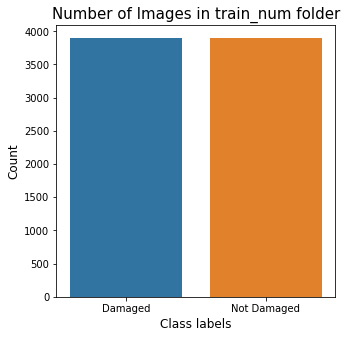

Number of Damaged images in trainImages is 3900
Number of Not Damaged images in trainImages is 3900


In [170]:
train_damaged2 = os.listdir('train_num/damaged')
train_undamaged2 = os.listdir('train_num/undamaged')
counts = [len(train_damaged2), len(train_undamaged2)]
plot_bar(classes, counts, 'train_num')
for i in range(len(classes)):
    print('Number of '+classes[i]+' images in trainImages is '+str(counts[i]))

# Balanced! yahoo

In [171]:
if not os.path.exists('processed_data'):
    os.mkdir('processed_data')
train_aug.to_csv('processed_data/train_aug.csv', index=False)
train_damaged_aug.to_csv('processed_data/train_damaged_aug.csv', index=False)
train_undamaged_aug.to_csv('processed_data/train_undamaged_aug.csv', index=False)

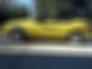

In [179]:
img = cv2.imread('train_num/undamaged/1377.jpg')
cv2_imshow(img)